# ProdMX : Rapid Query and Analysis of Protein Functional Domain based on Compressed Sparse Matries

GitHub: https://github.com/visanuwan/prodmx

## Example 1 : Finding and analyzing of conservation of primary sigma factor (RpoD) across *Escherichia coli* genomes

## 1. Installation

This section covers the basic installation of ProdMX from source code in our GitHub repository.<br>User can initiate the installation process from the pip installer with the path to the downloaded folder of ProdMx source code.

In [ ]:
%%bash

python -m pip install /path/to/prodmx

## 2. Analyses using ProdMX

Sigma factors are proteins that regulate the transcription process by promoting binding of RNA polymerase to promoter sites of DNA sequence in prokaryotes. Different groups of sigma factors are utilized to initiate different gene sets under different environmental conditions. Thus, analysis of diffrent groups of sigma factors allow us to identify types of regulon contributing to multiple functions of microbes, including virulence genes and virulence-associated genes. 

Here we show example usages of ProdMX in the analysis pipline for the 'housekeeping' sigma factor (RpoD) across selected set of high-quality *E. coli* genomes:

* **2.1.1) Using a protein functoinal domain to find a conservation of region 2 functional domain of σ70 proteins (RpoD)**
* **2.1.2) Retrieving all proteins contaning Region 2 functional domain of σ70 proteins (RpoD)**
* **2.2.1) Using a domain architecture to find a conservation of σ70 proteins (RpoD)**
* **2.2.2) Retrieving all σ70 proteins (RpoD)**

The following commands for the analysis pipeline of selected protein functional domain and domain architecture will be demonstrated in a Linux environment.
<br>The data used in the demonstration can be found in a `test/example_1` folder in the ProdMX repository.

### 2.1) Protein Functional Domain
A discrete structural unit that can convey a particular function in protein.

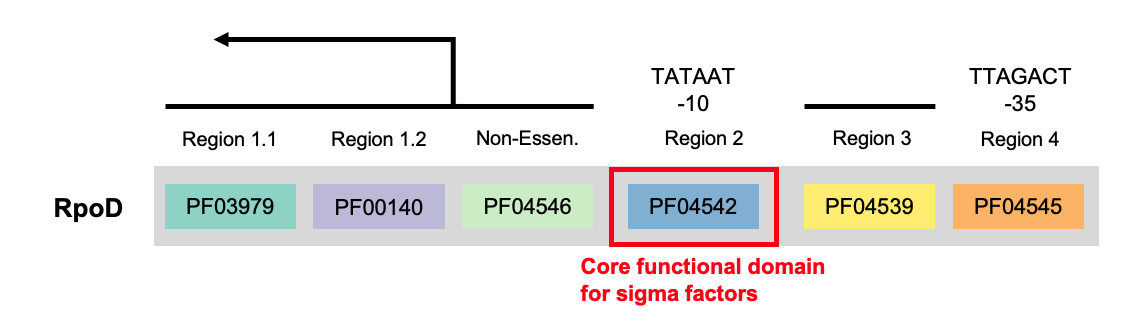

**Outline of the functional domains of σ70 proteins. A shaded box represents each P fam functional domain.<br>Note that region 2 (PF04542 , blue box) is conserved across all σ70 proteins.**
<br>Cook H, Ussery DW. Sigma factors in a thousand E. coli genomes. Environ Microbiol 2013;15:3121–9.<br>https://doi.org/10.1111/1462-2920.12236.

#### 2.1.1) Using a protein functoinal domain to find a conservation of region 2 functional domain of σ70 protein (RpoD)

Proposed by Cook et al., a Pfam accession number for the region 2 of σ70 proteins (RpoD) is `PF04542`.
<br> We can use accession number of this domain to find its conservation across the example set of *E. coli* genomes.

In [ ]:
import os
prodmx_test_folder = "/path/to/prodmx/test/example_1"
os.chdir(prodmx_test_folder)

First, we need to create the ProdMx matrix folder for protein functional domain using the provided list of HMMER results.
<br>A keep option (-k) allows us to store raw results of protein ids and their domains for further analysis.
<br>This option can be ignore if you don't want to retrieve protein ids later. It can speed up the time to generate the ProdMX matrix folder.

In [ ]:
%%bash

prodmx-buildDomain -i input_ecoli_id_hmm.tsv -o domain_matrix_fol -k

Next, we import the ProdMX as a package into Jupyter Notebook environment.
<br>The binary matrix can be loaded for the analysis with the following commands.

In [ ]:
import prodmx
import pandas as pd

output_matrix_fol = "domain_matrix_fol"
binary_matrix = prodmx.loadBinMatrix(matrix_fol=output_matrix_fol)

Further, to check if the region 2 domain of σ70 proteins (PF04542) is present in core functional domains (95% or more in conservation) across our set of 10 *E. coli* genomes or not, we need calculate the core protein functional domains by supplying the `calCore ` function with the information of all list of genome labels using `getRow` and all list of available protein functional domains using `getColumn`.

In [ ]:
df_core_domain = binary_matrix.calCore(list_row=binary_matrix.getRow(),
                                       list_col=binary_matrix.getColumn())

Using a Pandas DataFrame command, we can select rows based on condition. In this example, the number of *E. coli* genome possessing the region 2 domain of σ70 (PF04542) can be retrieved as follows.
<br>The result in the `col_sum` column indicated that all selected *E. coli* genomes contain the region 2 domain of σ70 protein.

In [ ]:
df_core_domain[df_core_domain['col_name'] == 'PF04542']

#### 2.1.2) Retrieving all proteins contaning Region 2 functional domain of σ70 proteins (RpoD)

Finally, the command below can be used to write all protein ids associated with the region 2 domain of σ70 for each genome to the output file in the tab-delimited format (GenomeId, Domain, ProteinId).

In [ ]:
binary_matrix.getProteinId(list_row=binary_matrix.getRow(),
                          list_col=['PF04542'],
                          output='ecoli_domain_region2_RpoD_protein_id.txt')

### 2.2) Protein Architecture

The different combinations of protein functional domains, which can be used as abstract models to simplify functional complexity in a protein.

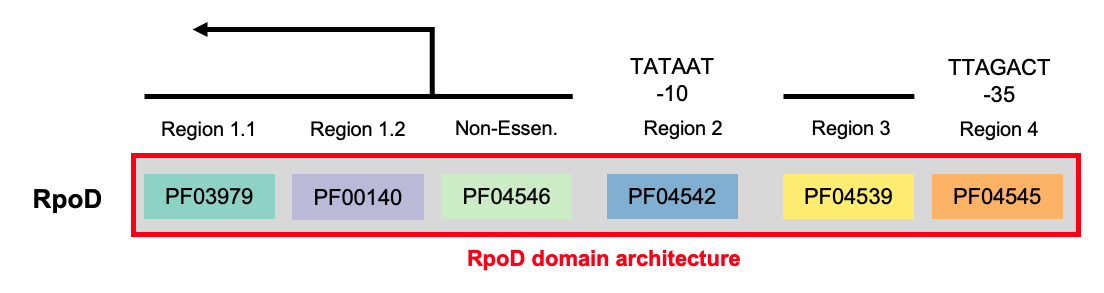

#### 2.2.1) Using a domain architecture to find a conservation of σ70 proteins (RpoD)

As seen in figure above, a combination of Pfam accession number for the σ70 protein (RpoD) is `PF03979_PF00140_PF04546_PF04542_PF04539_PF04545`.
<br>We can use this domain architecture to find its conservation across the example set of `E. coli` genomes.

In [ ]:
import os
prodmx_test_folder = "/path/to/prodmx/test"
os.chdir(prodmx_test_folder)

We need to create the ProdMx matrix folder for domain architectures using the provided list of HMMER results.
<br>A keep option (-k) allows us to store raw results of protein ids and their domain architectures for further analysis.

In [ ]:
%%bash
prodmx-buildArchitecture -i input_ecoli_id_hmm.tsv -o architecture_matrix_fol -k

Then, we import the ProdMX as a package into Jupyter Notebook environment.
<br>The binary matrix of domain architecture can be loaded for the analysis with the following commands.

In [ ]:
import prodmx

output_matrix_fol = "architecture_matrix_fol"
binary_arc_matrix = prodmx.loadBinMatrix(matrix_fol=output_matrix_fol)

To check if the σ70 protein (RpoD) is present in core domain architecture (95% or more in conservation) across our set of 10 *E. coli* genomes or not, we need to calculate the core domain architectures by supplying the `calCore ` function with the information of list of all genome labels using `getRow` and list of all available domain architecture using `getColumn`.

In [ ]:
df_core_architecture = binary_arc_matrix.calCore(list_row=binary_arc_matrix.getRow(),
                                                 list_col=binary_arc_matrix.getColumn())

The number of *E. coli* genome possessing the σ70 proteins (RpoD) can be retrieved with command below.
<br>The result in the `col_sum` column indicated that all selected *E. coli* genomes contain the σ70 proteins (RpoD).

In [ ]:
df_core_architecture[df_core_architecture['col_name'] == 'PF03979_PF00140_PF04546_PF04542_PF04539_PF04545']

#### 2.2.2) Retrieving all σ70 proteins (RpoD)

The following command can be used to write all protein ids associated with the σ70 proteins (RpoD) for each genome to the output file in the tab-delimited format (GenomeId, Architecture, ProteinId).

In [ ]:
binary_arc_matrix.getProteinId(list_row=binary_arc_matrix.getRow(),
                          list_col=['PF03979_PF00140_PF04546_PF04542_PF04539_PF04545'],
                          output='ecoli_architecture_RpoD_protein_id.txt')